In [1]:
import pandas as pd
from matplotlib import pyplot as plt

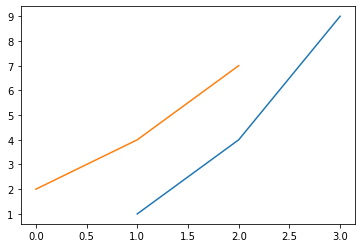

In [3]:
#Basics of plotting part1
x=[1,2,3]
y=[1,4,9]
z=[2,4,7]
plt.plot(x,y,z)
plt.show()

In [8]:
#importing data for plotting part2
data=pd.read_csv('sample_data.csv')
data

,column_a,column_b,column_c
0,1,1,10
1,2,4,8
2,3,9,6
3,4,16,4
4,5,25,2


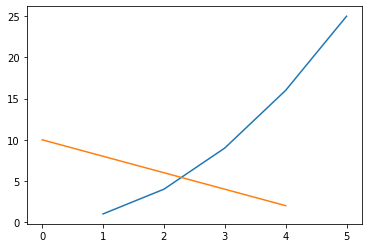

In [10]:
plt.plot(data.column_a,data.column_b,data.column_c)
plt.show()

In [12]:
#countries data for population comparison
country=pd.read_csv('countries.csv')
country

,country,year,population
0,Afghanistan,1952,8425333
1,Afghanistan,1957,9240934
2,Afghanistan,1962,10267083
3,Afghanistan,1967,11537966
4,Afghanistan,1972,13079460
...,...,...,...
1699,Zimbabwe,1987,9216418
1700,Zimbabwe,1992,10704340
1701,Zimbabwe,1997,11404948
1702,Zimbabwe,2002,11926563


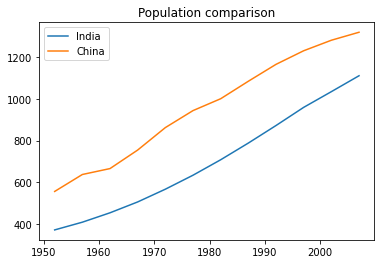

In [21]:
india = country[country.country == 'India']
china = country[country.country == 'China']
plt.plot(india.year,india.population/10**6,china.year,china.population/10**6)
plt.title('Population comparison')
plt.legend(['India','China'])
plt.show()

In [22]:
#Linear regression on advertising dataset
import numpy as np
import seaborn as sns
%matplotlib inline

In [24]:
#import data
ad_data= pd.read_csv('advertising.csv')
ad_data.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your c

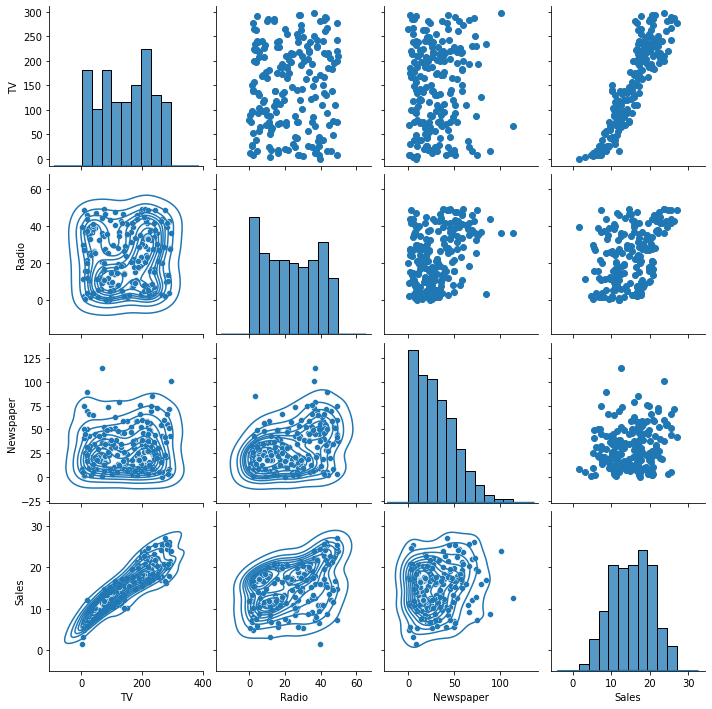

In [25]:
#Exploratory Data Analysis(EDA)
p=sns.pairplot(ad_data)
p.map_upper(plt.scatter)
p.map_diag(sns.distplot)
p.map_lower(sns.kdeplot)


In [26]:
ad_data.corr()

,TV,Radio,Newspaper,Sales
TV,1.000000,0.054809,0.056648,0.901208
Radio,0.054809,1.000000,0.354104,0.349631
Newspaper,0.056648,0.354104,1.000000,0.157960
Sales,0.901208,0.349631,0.157960,1.000000


In [27]:
X = ad_data.drop('Sales',axis=1)
y = ad_data['Sales']

In [29]:
#splitting dataset into test and train
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [30]:
#train model
from sklearn.linear_model import LinearRegression
model=LinearRegression()
model.fit(X_train, y_train)
pd.DataFrame(model.coef_ , X.columns ,columns=['coefcient'])

,coefcient
TV,0.054930
Radio,0.109558
Newspaper,-0.006194


In [31]:
y_pred= model.predict(X_test)
y_pred

array([13.9135865 , 21.62343243, 12.55005536, 15.63103677,  9.09302258,
        7.36166823, 22.16816235, 19.01730616, 12.5403485 , 20.1958892 ,
       11.11003915, 16.00478644, 17.18905675, 20.64733809, 18.73126496,
        9.83559653, 19.38504198, 10.04559423,  8.5846359 , 21.13742066,
        7.85466978, 18.20668736, 24.98984844, 23.37377505,  9.48472574,
       15.78159162, 23.83233016,  9.00279152, 14.76422844, 10.22546576,
        9.42584326, 20.14570699, 12.53758192,  6.84104318, 17.82338233,
        9.99895594, 10.60349364, 10.34231459,  9.08661201, 13.51673678,
       11.70916589, 12.40929764, 11.34601326,  7.77913091, 11.66495504,
       10.61497748,  8.19540167, 18.58328863, 15.43408923, 20.31281347,
       11.15187972, 16.80304378, 21.0466453 , 12.69609768, 15.80981534,
        6.142007  , 24.10975006, 11.31786524, 21.45998282, 16.56943553])

In [32]:
np.array(y_test)

array([14.7, 19.8, 11.9, 16.7, 11. ,  6.6, 20.2, 17. , 10.3, 20.1, 10.9,
       17.1, 16.5, 23.7, 19.2, 10.1, 17. , 11.9,  8.4, 21.5,  7.6, 16. ,
       27. , 24.2, 11.3, 16.4, 20.7,  9.7, 17.6, 12. ,  9.2, 19.6, 14. ,
        5.6, 17.1, 13.2, 10.6, 14. ,  7.3, 15.5, 12.5, 10.3, 12.3,  7. ,
       11.8, 11.3,  5.3, 19.8, 17.9, 22.4, 10.4, 17.9, 19.8, 11.9, 15.6,
        3.2, 25.4, 10.8, 17.4, 16.1])

In [33]:
#evaluateing model
from sklearn import metrics
MAE=metrics.mean_absolute_error(y_test , y_pred)
MSE=metrics.mean_squared_error(y_test , y_pred)
RMSE=np.sqrt(MSE)
a=pd.DataFrame([MAE,MSE,RMSE], index=['MAE','MSE','RMSE'],columns=['Quantity'])
a

,Quantity
MAE,1.373120
MSE,2.868571
RMSE,1.693686


Text(0.5, 1.0, 'bias of y')

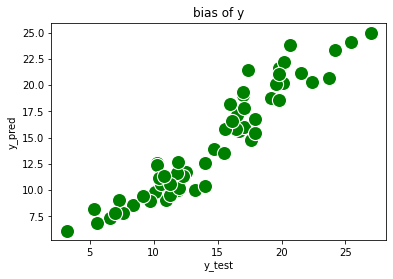

In [34]:
#residual test
test_residual=y_test-y_pred
sns.scatterplot(x=y_test,y=y_pred,color='green' ,s=200)
plt.ylabel('y_pred')
plt.xlabel('y_test')
plt.title('bias of y')

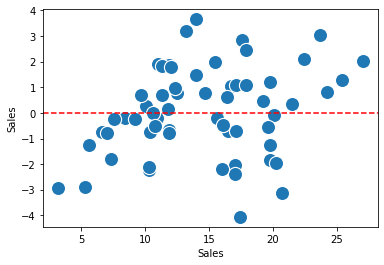

In [35]:
sns.scatterplot(x=y_test,y=test_residual,s=200)
plt.axhline(y=0,color='red',ls='--')